In [1]:
'''
Analysis for "Technical considerations of MSK femoral cartilage segmentation using CNNs"

Compare distributions of testing probabilities among different 

@author: Arjun Desai, Stanford University
         (c) Stanford University, 2018
'''

import sys
sys.path.insert(0, '../')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import utils
from analysis import analysis_funcs as af
from analysis import stats
import h5py

def load_all_recon(dirpath):
    data = []
    for file in os.listdir(os.path.join(dirpath)):
        if file.endswith('.pred'):
            with h5py.File(os.path.join(dirpath, file)) as f:
                data.append(f['recon'][:])
    data = np.asarray(data)
    return data.flatten()
    

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


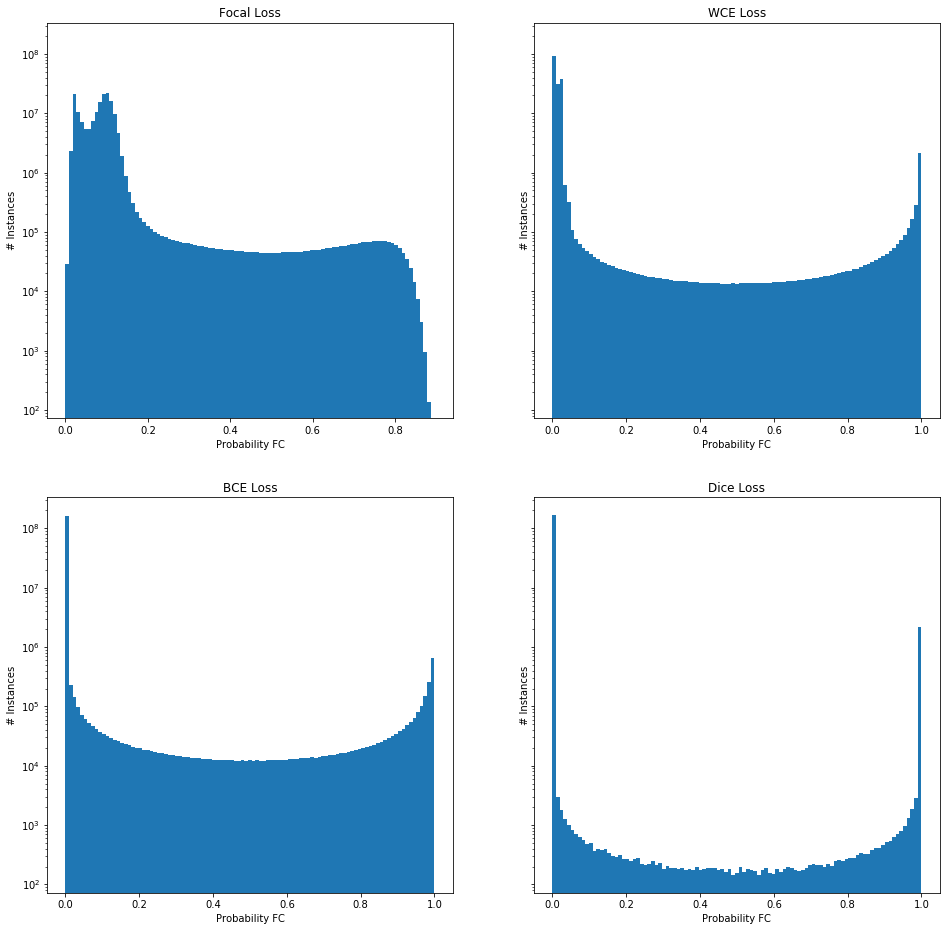

In [2]:
# Initialize figure
fig, axs = plt.subplots(2, 2, sharey=True, figsize=(16,16))

# Focal Loss
fpath = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-11-09-07-23-00/test_results/'

data = load_all_recon(fpath)
ax = axs[0][0]

ax.hist(data.flatten(), bins=101, stacked=True)
ax.set_xlabel('Probability FC')
ax.set_ylabel('# Instances')
ax.set_title('Focal Loss')

# WCE
fpath = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-10-21-00-49-34/test_results/'

data = load_all_recon(fpath)
ax = axs[0][1]
ax.hist(data.flatten(), bins=101, stacked=True)
ax.set_xlabel('Probability FC')
ax.set_ylabel('# Instances')
ax.set_title('WCE Loss')

# BCE
fpath = '/bmrNAS/people/arjun/msk_seg_networks/loss_limit/unet_2d/2018-10-28-06-23-04/test_results/'

data = load_all_recon(fpath)
ax = axs[1][0]

ax.hist(data.flatten(), bins=101, stacked=True)
ax.set_xlabel('Probability FC')
ax.set_ylabel('# Instances')
ax.set_title('BCE Loss')

# Dice
fpath = '/bmrNAS/people/arjun/msk_seg_networks/architecture_limit/unet_2d/2018-11-26-00-56-55/test_results'

data = load_all_recon(fpath)
ax = axs[1][1]
ax.hist(data.flatten(), bins=101, stacked=True)
ax.set_xlabel('Probability FC')
ax.set_ylabel('# Instances')
ax.set_title('Dice Loss')

plt.yscale('log', nonposy='clip')
plt.show()